<a href="https://colab.research.google.com/github/Bestpeera/Project/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#perform authorization to access Google Drive 
from google.colab import drive
#mount you GoogleDrive to "drive" folder
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/first_ai

/content/drive/MyDrive/first_ai


In [ ]:
ls

'สำเนาของ COIN.ipynb'   dataSet/   logs/   mask_rcnn_coco.h5   mrcnn/


In [ ]:
ROOT_DIR = './'

In [ ]:
#เป็นการตรวจสอบว่าเครื่องเรามี GPU หรือไม่
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6754418143103747490
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12299765258842318842
physical_device_desc: "device: XLA_CPU device"
]


In [ ]:
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

     |████████████████████████████████| 92.6 MB 1.3 MB/s 
     |████████████████████████████████| 3.2 MB 40.3 MB/s 
     |████████████████████████████████| 367 kB 52.4 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you

     |████████████████████████████████| 276 kB 5.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
#ตั้งค่าให้ code ใช้ CUDA_VISIBLE_DEVICES ของ GPU ในการ Train ข้อมูล
import os
os.environ["CUDA_DEVICE_ORDER"]="0000:01:00.0"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
#ประกาศ Lib ที่จำเป็น
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw
import skimage.draw
import os
import imgaug as ia
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt
import pandas as pd
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

In [ ]:
# Import mrcnn libraries
sys.path.append(ROOT_DIR)
print(str(ROOT_DIR))
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib
from mrcnn.model import log
leaf_DIR = os.path.join(ROOT_DIR, "dataSet")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
#COCO_MODEL_PATH = os.path.join('../Own_data', "mask_rcnn_coco.h5")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

#COCO_MODEL_PATH = "logs/dog20190913T1304/mask_rcnn_dog_0020.h5"   #เป็น pre train weight ที่ได้รับการ train มาแล้ว

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

./


Using TensorFlow backend.


In [ ]:
#ตั้งค่า Path ของ log เพื่อเก็บ weight model และ เรียกใช้ COCO_MODEL เริ่มต้น
ROOT_DIR = os.getcwd()
if ROOT_DIR.endswith("../example_1"):
    # Go up two levels to the repo root
    ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))

In [ ]:
pwd

'/content/drive/MyDrive/first_ai'

In [ ]:
#เป็นการสร้าง class เพื่อทำ config ใช้สำหรับการ Train
class coinConfig(Config):
    NAME = "example_1"
    
#เป็นการกำหนด Batch size มีค่าเท่ากับ (GPUs * images/GPU)
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
#เป็นการกำหนดจำนวน class ให้รวม background ไปด้วย
    NUM_CLASSES = 1 + 1  #background + 1
    
#กำหนดขนาดของรูปที่ใช้ Train และ Test
# Input image resizing
    # Generally, use the "square" resizing mode for training and predicting
    # and it should work well in most cases. In this mode, images are scaled
    # up such that the small side is = IMAGE_MIN_DIM, but ensuring that the
    # scaling doesn't make the long side > IMAGE_MAX_DIM. Then the image is
    # padded with zeros to make it a square so multiple images can be put
    # in one batch.
    # Available resizing modes:
    # none:   No resizing or padding. Return the image unchanged.
    # square: Resize and pad with zeros to get a square image
    #         of size [max_dim, max_dim].
    # pad64:  Pads width and height with zeros to make them multiples of 64.
    #         If IMAGE_MIN_DIM or IMAGE_MIN_SCALE are not None, then it scales
    #         up before padding. IMAGE_MAX_DIM is ignored in this mode.
    #         The multiple of 64 is needed to ensure smooth scaling of feature
    #         maps up and down the 6 levels of the FPN pyramid (2**6=64).
    # crop:   Picks random crops from the image. First, scales the image based
    #         on IMAGE_MIN_DIM and IMAGE_MIN_SCALE, then picks a random crop of
    #         size IMAGE_MIN_DIM x IMAGE_MIN_DIM. Can be used in training only.
    #         IMAGE_MAX_DIM is not used in this mode.
    #IMAGE_RESIZE_MODE = "none"
    IMAGE_RESIZE_MODE = "square"
    
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    
#เป็นการตั้งต่าในการเรียนรู้ต่อรอบการ Train แล้วเราจะหาตัวเลขที่เหมาะสมได้อย่างไร? จากรูปด้านล่างครับ
    STEPS_PER_EPOCH = 60
    
#step ของการตรวจสอบ
    VALIDATION_STEPS = 10
    
#ใช้ BACKBONE เป็น resnet101
    BACKBONE = 'resnet101'

    LEARNING_RATE = 0.001
    LEARNING_MOMENTUM = 0.9

config = coinConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
#สร้าง class เพื่อจัดการ dataset
class coinDataset(utils.Dataset):
    def load_data(self, dataset_dir, subset):
        # Add classes. We have only one class to add.
        self.add_class("example_1", 1, "example_1")
        
        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        annotations = json.load(open(os.path.join(dataset_dir, "via_region_data.json")))
        annotations = list(annotations.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]

        # Add images
        for a in annotations:
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. These are stores in the
            # shape_attributes (see json format above)
            # The if condition is needed to support VIA versions 1.x and 2.x.
            if type(a['regions']) is dict:
                polygons = [r['shape_attributes'] for r in a['regions'].values()]
            else:
                polygons = [r['shape_attributes'] for r in a['regions']] 

            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "example_1",
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons)

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a balloon dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "example_1":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

In [ ]:
ls dataSet/test/

example_1_6.jpg


In [ ]:
leaf_DIR

'./dataSet'

In [ ]:
annotations = json.load(open('dataSet/val/via_region_data.json'))

In [ ]:
dataset_train = coinDataset()
dataset_train.load_data(leaf_DIR, 'train')
dataset_train.prepare()

In [ ]:
dataset_val = coinDataset()
dataset_val.load_data(leaf_DIR, 'val')
dataset_val.prepare()

Image Count: 7
Class Count: 2
  0. BG                                                
  1. example_1                                         


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


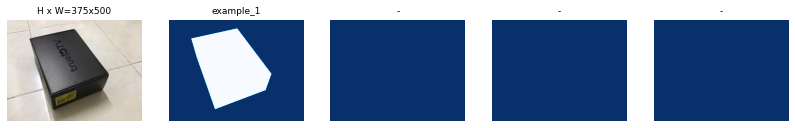

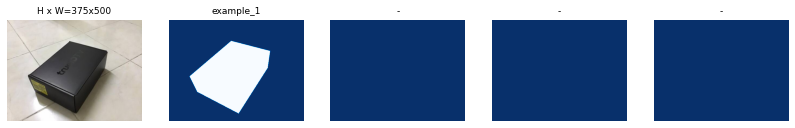

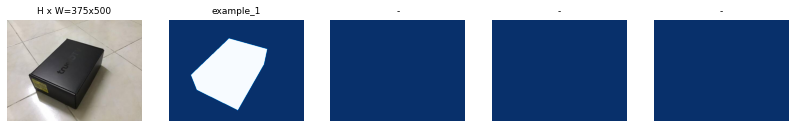

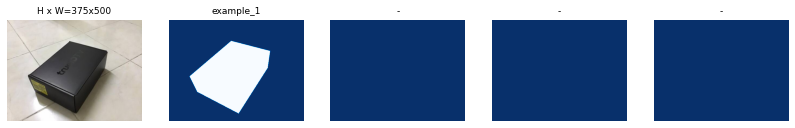

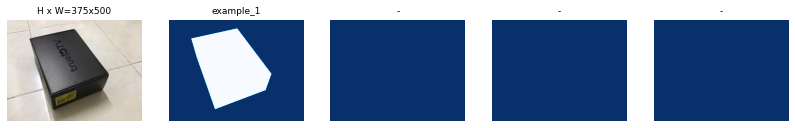

In [ ]:
print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))
    
dataset = dataset_train
image_ids = np.random.choice(dataset.image_ids, 5)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


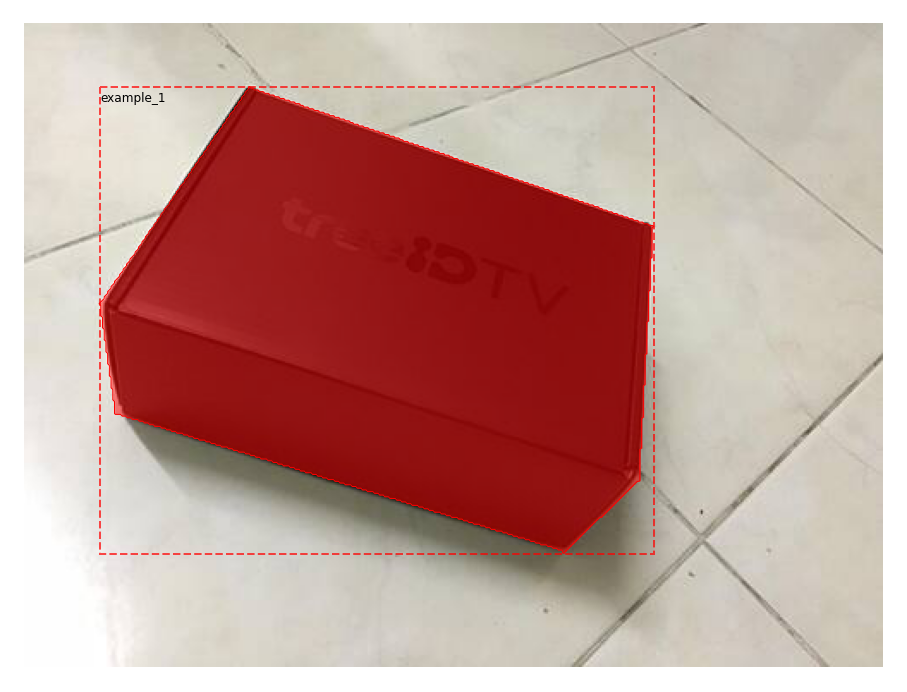

In [ ]:

#visualize.display_top_masks(image, mask, class_ids, dataset.class_names)
image_id = 1
image = dataset_val.load_image(image_id)
# load the masks and the class ids
mask, class_ids = dataset_val.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, dataset_val.class_names)

In [ ]:
COCO_MODEL_PATH

'./mask_rcnn_coco.h5'

In [ ]:
#สร้าง model Training
model = modellib.MaskRCNN(mode="training", config=config,model_dir=MODEL_DIR)
init_with = "coco"
if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
#ทำ augmentation ดูตัวอย่างได้ เพื่อลดการ over fiting
augmentation = iaa.Sequential([
    iaa.OneOf([ ## rotate
        iaa.Affine(rotate=0),
        iaa.Affine(rotate=90),
    ]),
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.OneOf([ ## brightness or contrast
        iaa.Multiply((0.9, 1.1)),
        iaa.ContrastNormalization((0.9, 1.1)),
    ]),
    iaa.OneOf([ ## blur or sharpen
        iaa.GaussianBlur(sigma=(0.0, 0.1)),
        iaa.Sharpen(alpha=(0.0, 0.1)),
    ]),
])

In [ ]:
#ตั้งค่าให้ GPU:0 ทำงาน
import warnings
warnings.filterwarnings('ignore')
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

In [ ]:
#เริ่มนับเวลาในการ Train
start_train = time.time()

# Training - Stage 1
print("Training network ALL")
model.train(dataset_train, dataset_val,learning_rate=config.LEARNING_RATE, epochs=5, layers='all',augmentation=augmentation)
#model.train(dataset_train, dataset_val,learning_rate=config.LEARNING_RATE, epochs=1, layers='heads',augmentation=augmentation)

#model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')
history = model.keras_model.history.history

Training network ALL

Starting at epoch 0. LR=0.001

Checkpoint Path: ./logs/example_120220224T1516/mask_rcnn_example_1_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3

KeyboardInterrupt: ignored

In [ ]:
pwd


'/content/drive/MyDrive/first_ai'

In [ ]:
class InferenceConfig(coinConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 1024
    DETECTION_MIN_CONFIDENCE = 0.9
    

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
#model_path = model.find_last()

model_path = "/content/drive/MyDrive/first_ai/logs/example_120220210T1402/mask_rcnn_example_1_0004.h5"
#model_path = COCO_MODEL_PATH

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

import skimage


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Loading weights from  /content/drive/MyDrive/first_ai/logs/example_120220210T1402/mask_rcnn_example_1_0004.h5
Re-starting from epoch 4


In [ ]:
ls dataSet/test/

example_1_6.jpg


Processing 1 images
image                    shape: (1536, 2048, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2048.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[ 196    0 1245 1674]]
(1536, 2048, 3)


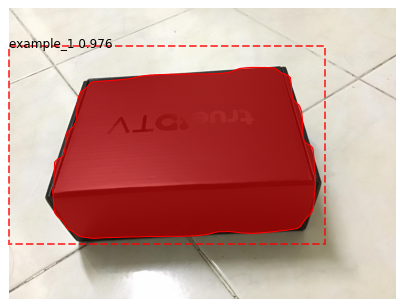

In [ ]:
real_test_dir = './dataSet/test/'
image_paths = []
for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        image_paths.append(os.path.join(real_test_dir, filename))

for image_path in image_paths:
    img = skimage.io.imread(image_path)
    img_arr = np.array(img)
    results = model.detect([img_arr], verbose=1)
    r = results[0]
    print(r['rois'])
    print(img.shape)
    visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                                dataset_val.class_names, r['scores'], figsize=(7,7))
    

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/drive/MyDrive/first_ai/dataSet/test/example_1_6.jpg')
blur = cv2.GaussianBlur(image, (5,5), 0)
blur_hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

# create NumPy arrays from the boundaries
lower = np.array([0,0,0], dtype = "uint8")
upper = np.array([180,255,40], dtype = "uint8")
print(r)
# find the colors within the specified boundaries and apply
mask = cv2.inRange(blur_hsv, lower, upper)  
#print(mask)
mask2 = 255 - mask
output = cv2.bitwise_and(image, image, mask = mask)

# show the images
#cv2_imshow( mask2)
#cv2_imshow( mask)
#cv2.imshow("output", output)
#cv2.imshow("mask", mask)
#cv2.waitKey()

{'rois': array([[ 196,    0, 1245, 1674]], dtype=int32), 'class_ids': array([1], dtype=int32), 'scores': array([0.97622937], dtype=float32), 'masks': array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])}


(1536, 2048, 3)


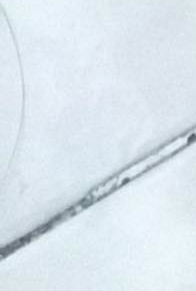

In [ ]:
from google.colab.patches import cv2_imshow
src = img
#cv.namedWindow("input image", cv.window_autosize) # Create a GUI window, form is adaptive
#cv.imshow("input image", SRC) # Contacts images and windows through the name
print(src.shape)
#flower = src[200:400,100:250]
flower = src[1245:1674, 0:196]
#flower = src[r['rois']]
cv2_imshow(flower)
gray = cv2.cvtColor (flower, cv2.COLOR_BGR2GRAY) #Get a grayscale image, a single channel
#cv2.cvtColor(ave_image,cv2.COLOR_BGR2RGB)
backface = cv2.cvtColor (gray, cv2.COLOR_GRAY2BGR) # Single channel to 3 channels
flower= backface
#cv2_imshow(src)